## Исследование данных о пассажирах Титаника

Данные взяты с Kaggle Titanic Challenge по следующей ссылке:  
https://www.kaggle.com/c/titanic-gettingStarted

Вопросы:

1. Кто были люди, являющими пассажирами на Титанике? (Возраст, пол, класс, .. и т.д.)
2. На какой палубе находились пассажиры и как это соотносится с их классом?
3. В каких городах пассажиры сели на кораболь?
4. Были пассажиры одни или с семьей?
5. Какие факторы повлияли на то выжил пассажир или нет?
6. Повлияло ли на то выжил пассажир или нет то, на какой палубе он размещался?
7. Влияет ли количество родственников на получение больших шансов на выживание?

In [ ]:
#импортируем необходимые для работы библиотеки
import pandas as pd
from pandas import Series,DataFrame

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#прочитаем данные и посмотрим таблицу
titanic_df = pd.read_csv('train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 1. Кто были люди, являющими пассажирами на Титанике? (Возраст, пол, класс, .. и т.д.)

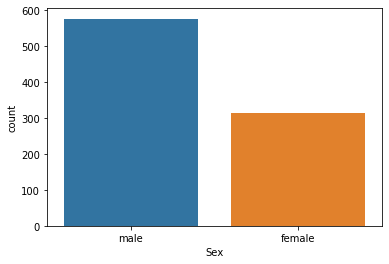

In [11]:
#узнаем соотношение пассажиров мужского и женского пола

sns.countplot(x = 'Sex', data = titanic_df)

Пассажиров мужского пола было почти в 2 раза больше, чем женщин

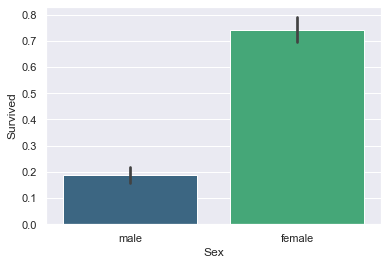

In [178]:
#выжившие мужчины и женщины

sns.barplot('Sex','Survived',data=titanic_df, palette = 'viridis')

Женщин выжило в 3 раза больше, чем мужчин.

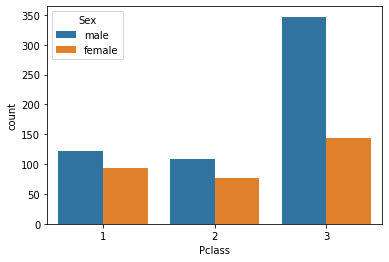

In [12]:
#распределение мужчин и женщин по классам

sns.countplot('Pclass',data=titanic_df,hue='Sex')

Более половины мужчин на корабле были пассажирами 3 класса.

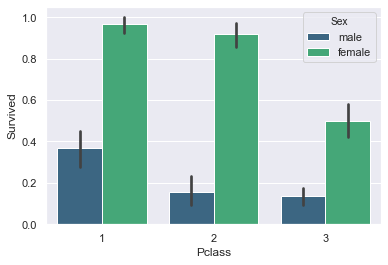

In [181]:
#распределение выживших мужчин и женщин по классам

sns.barplot('Pclass','Survived',data=titanic_df, hue='Sex', palette = 'viridis')

In [13]:
#добавляем колонку с разделением на мужчин, женщин и детей (до 16 лет)

def male_female_child(passenger):
    # Take the Age and Sex
    age,sex = passenger
    # Compare the age, otherwise leave the sex
    if age < 16:
        return 'child'
    else:
        return sex
    
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [14]:
titanic_df[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


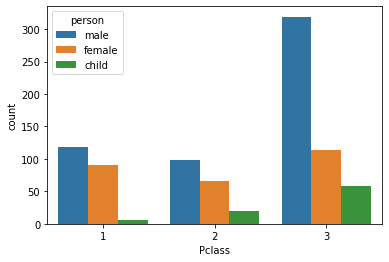

In [15]:
#распределение мужчин, женщин и детей по классам

sns.countplot('Pclass',data=titanic_df,hue='person')

In [ ]:
Большая часть детей на корабле так же приходилась на 3 класс.

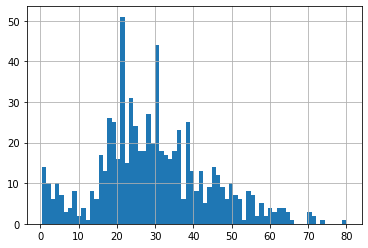

In [16]:
#возраст пассажиров

titanic_df['Age'].hist(bins=70)

In [17]:
#средниц возрст пассажиров

titanic_df['Age'].mean()

29.69911764705882

Средний возраст пассажиров был около 30 лет

In [18]:
#число пассажиров мужчин, женщин и детей

titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

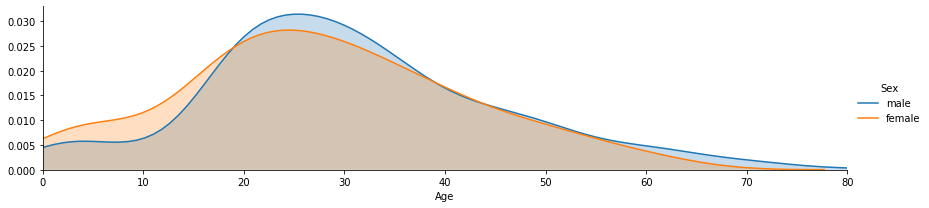

In [19]:
#распределение по возрасту мужчин и женщин

fig = sns.FacetGrid(titanic_df, hue="Sex",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))
fig.add_legend()

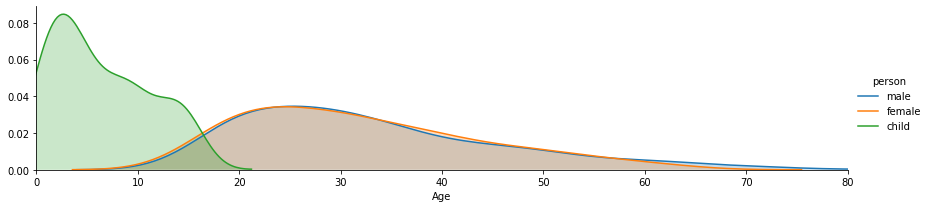

In [20]:
#распределение по возрастам мужчин, женщин и детей

fig = sns.FacetGrid(titanic_df, hue="person",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

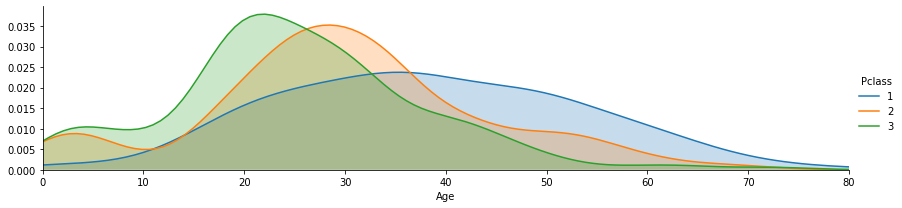

In [21]:
#распределение пассажиров по возрасту и классам

fig = sns.FacetGrid(titanic_df, hue="Pclass",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

Тут мы так же видим, что среди пассажиров 2-3 класса были в основном молодые люди 20-30 лет, в то время как среди пассажиров 1 класса было больше людей более старшего возраста.

### 2. На какой палубе находились пассажиры и как это соотносится с их классом?

In [22]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [23]:
#создаем новый объект и удаляем пустые значения из Cabin

deck = titanic_df['Cabin'].dropna()

In [24]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

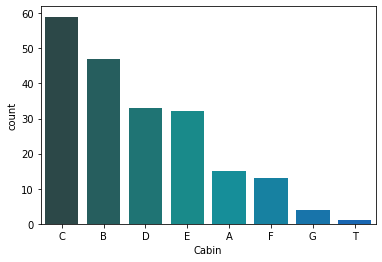

In [36]:
#присвоим палубам буквенные значения

levels = []

for level in deck:
    levels.append(level[0])    

cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.countplot('Cabin',data=cabin_df,palette='winter_d', order = cabin_df['Cabin'].value_counts().index)

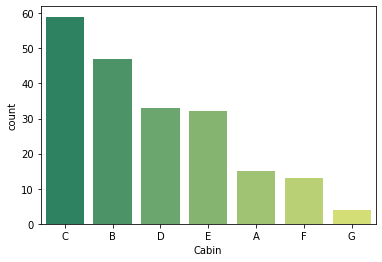

In [37]:
#убираем лишнюю палубу T

cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.countplot('Cabin',data=cabin_df,palette='summer', order = cabin_df['Cabin'].value_counts().index)

In [ ]:
Большая часть пассажиров приходилась на палубы С и В.

### 3. В каких городах пассажиры сели на кораболь?

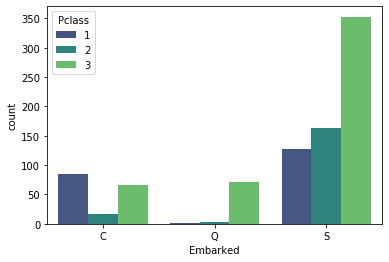

In [45]:
#в каких городах сколько пассажиров и какого класса сели на корабль

sns.countplot('Embarked',data=titanic_df,hue='Pclass',order=['C','Q','S'], palette='viridis')

C = Cherbourg, Q = Queenstown, S = Southampton
В Queenstown на корабль сели пассажиры только 3 класса, вызывает интерес экономическое положение в городе в то время
В Cherbourg на корабль село много пассажиров 1 класса, что так же вызывает интерес
Southampton является крупным портом, поэтому там на корабль село наиболшее число пассажиров всех классов.

### 4. Были ли пассажиры одни или с семьей?

In [46]:
#создадим новый столбец 'Alone', если значение в нем 0 - пассажир был один 

titanic_df['Alone'] =  titanic_df.Parch + titanic_df.SibSp
titanic_df['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [47]:
#отмечаем, кто из пассажиров был один, а кто с семьей

titanic_df['Alone'].loc[titanic_df['Alone'] >0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

C:\Users\datur\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [48]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


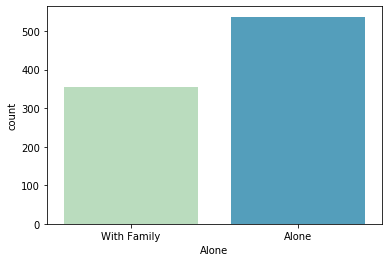

In [49]:
#количество пассажиров с смьей и без

sns.countplot('Alone',data=titanic_df,palette='GnBu')

Более половины пассажиров на корабле были одни без родственников и семьи.

### 5. Какие факторы повлияли на то выжил пассажир или нет?

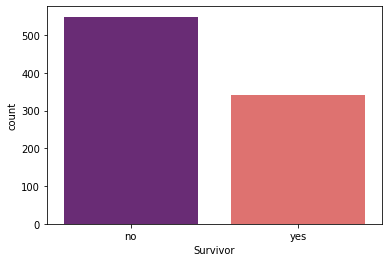

In [55]:
#добавляем новую колонку с комментарием выжил человек или нет
#визуализируем соотношение выживших и погибших

titanic_df["Survivor"] = titanic_df.Survived.map({0: "no", 1: "yes"})
sns.countplot('Survivor',data=titanic_df, palette ='magma')

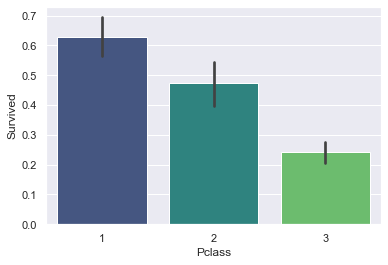

In [65]:
#посмотрим, является ли класс фактором влияющим на то выжил пассажир или нет

sns.barplot('Pclass','Survived',data=titanic_df, palette = 'viridis')

Очевидно, что среди пассажиров 1 класса наибольшее число выживших.

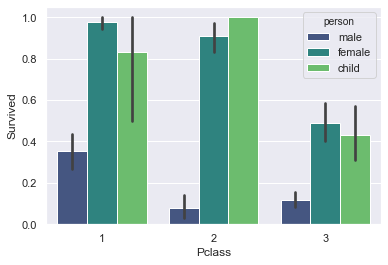

In [75]:
#соотношение выживших мужчин, женщин и детей по классам

sns.barplot('Pclass','Survived',hue='person',data=titanic_df, palette = 'viridis')

In [ ]:
Мы видим, что наибольшее число выживших составляют женщины и дети. Наибольшее число выживших детей из 2 класса.
Наибольшее число выживших мужчин из 1 класса. 

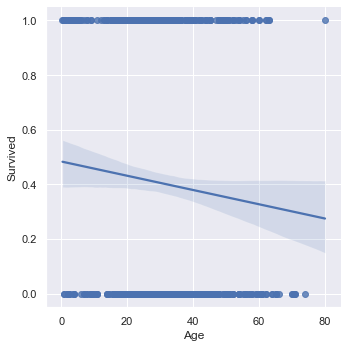

In [76]:
#является возраст фактором повлиявшим на выживание

sns.lmplot('Age','Survived',data=titanic_df)

Возраст является важным фактором, повлиявшим на выживание, потому что детей сажали в шлюбки в первую очередь.

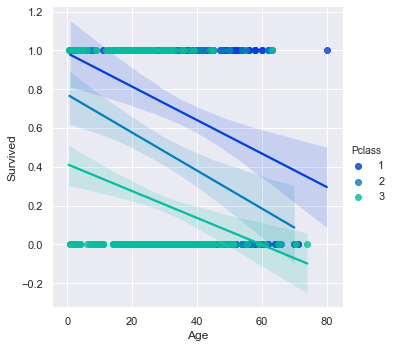

In [77]:
#разспределение выжившыих и погибших по классу и возрасту

sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter')

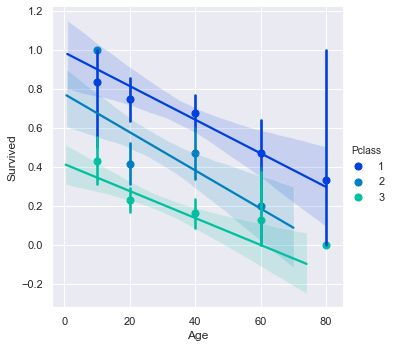

In [78]:
generations=[10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter',x_bins=generations)

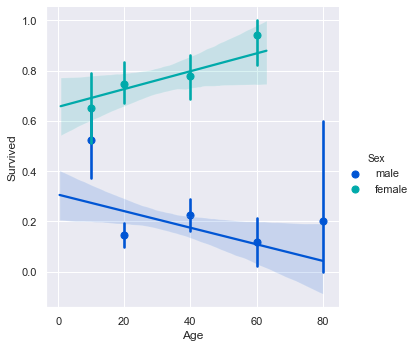

In [79]:
#выжившие отображены по полу и возрасту

sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='winter',x_bins=generations)

У пожилых женщин было больше шансов на спасение.

In [151]:
#создадим таблицу с пассажирами женского пола старше 50 лет

old_lady_df = titanic_df.loc[(titanic_df['Age'] >= 50) & (titanic_df['person'] == 'female')]
old_lady_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor,Cabin_lvl
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female,Alone,yes,C
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S,female,Alone,yes,F
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C,female,Alone,no,D
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C,female,Alone,yes,D
259,260,1,2,"Parrish, Mrs. (Lutie Davis)",female,50.0,0,1,230433,26.0000,NaN,S,female,With Family,yes,NaN


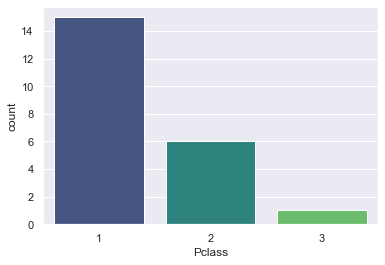

In [150]:
#количество женщин старше 50 лет на корабле и их распределение по классам

sns.countplot('Pclass',data=old_lady_df, palette = 'viridis')

Большая часть пассажиров женского пола старше 50 была в 1 классе, в 3 классе была всего одна пассажирка старше 50.

### 6. Повлияло ли на то выжил пассажир или нет то, на какой палубе он размещался?

In [87]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


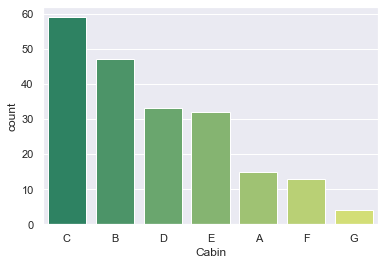

In [88]:
#распределение пассажиров по палубам

cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.countplot('Cabin',data=cabin_df,palette='summer', order = cabin_df['Cabin'].value_counts().index)

In [101]:
#добавим новую колонку 'Cabin_lvl' с уровнем палубы

titanic_df['Cabin_lvl'] = cabin_df['Cabin']
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor,Cabin_lvl
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no,C
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes,E
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes,G
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no,C


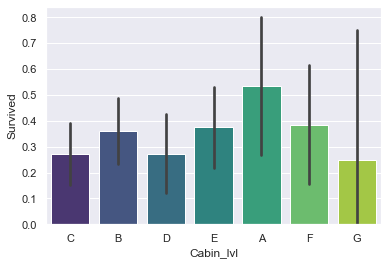

In [134]:
#распределение выживших по палубам 
#палубы располагаются по убыванию численности пассажиров как на предыдщем графике (т.е. С - наибольшее число пассажиров)

sns.barplot('Cabin_lvl','Survived',data=titanic_df, palette = 'viridis', order=titanic_df['Cabin_lvl'].value_counts().index)

Выживших пассажиров палубы А больше всего, хотя их численность составляет примерно 1/3 численности пассажиров палубы С
Меньше всего выживших пассажиров с палуб С и D, хотя палуба С была самой большой по численности.

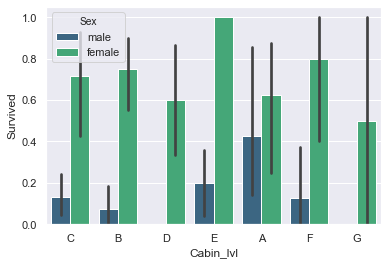

In [153]:
#распределение выживших по палубам в зависимости от того это мужчина или женщина 
#палубы располагаются по убыванию численности пассажиров как на предыдщем графике (т.е. С - наибольшее число пассажиров)

sns.barplot('Cabin_lvl','Survived',hue='Sex',data=titanic_df, palette = 'viridis', order=titanic_df['Cabin_lvl'].value_counts().index)

На палубе А самый высокий процент выживших, в том числе выживших мужчин на корабле. 
Палубы D и E почти одинаковы по численности пассажиров, но с палубы E спасено много людей, в том числе больше мужчин, чем с самой многочисленной палубы C и остальных палуб, находящихся ниже. 
На палубе E рсполагались каюты экипажа, что оказалось важным фактором, т.к. члены экипажа эвакуировали пассажиров и имели больше шансов выжить, чем простые пассажиры мужского пола из 2 и 3 класса.

### 7. Влияет ли количество родственников на получение больших шансов на выживание?

In [152]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor,Cabin_lvl
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no,C
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes,E
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes,G
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no,C


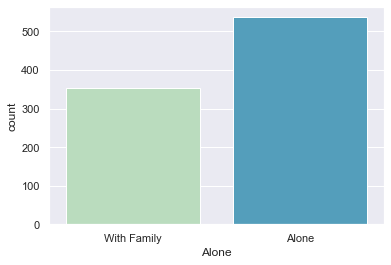

In [156]:
#количество пассажиров с смьей и без

sns.countplot('Alone',data=titanic_df,palette='GnBu')

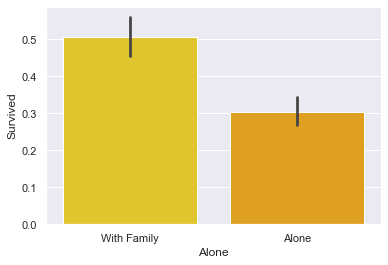

In [162]:
#количество выживших пассажиров с семьей и без

sns.barplot('Alone','Survived',data=titanic_df, palette = 'Wistia')

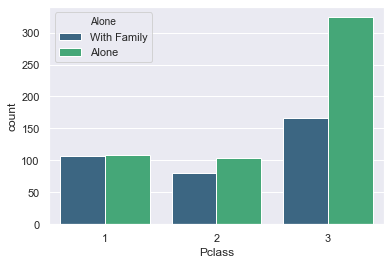

In [160]:
#cоотношение людей с смеьей и без на корабле по классам

sns.countplot('Pclass',hue='Alone',data=titanic_df, palette = 'viridis')

Больше всего людей с родственниками и семьями было в 3 классе, но в то же время одинокие пассажиры превышают их численность в 2 раза. В 1 классе одиноких и с семьей пассажиров количество одинаковое. 

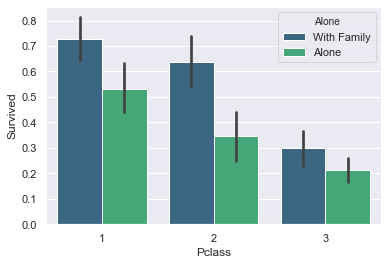

In [158]:
#количество выживших пассажиров по классам имевших семью на борту и путшествующих в одиночестве

sns.barplot('Pclass','Survived',hue='Alone',data=titanic_df, palette = 'viridis')

Во всех 3 классах количество выживших, имевших семью на борту значительно выше, чем одиноких пассажиров. Из чего можно сделать вывод, что большое количество взрослых должно было сопровождать детей и их размещали в шлюках вместе. 

### Выводы

• Средний возраст пассажиров на корабле был около 30 лет. Пожилые люди были в основном в 1 классе. Большенство детей путешествовало в 3 и 2 классе.

• Больше половины пассажиров были молодыми людьми из 2 и 3 класса, путешествующими в одиночку, искавшие лучшей жизни. При этом большая часть выживших путешествовала не одна, а с семьей. 

• Мужчин было в 2 раза больше, чем женщин. При этом женщин выжило в 3 раза больше, чем мужчин.

• Выжными факторами, повлиявшими на то выживет пассажир или нет оказались: класс, пол, наличие семьи на корабле, был ли мужчина членом команды. Больше всего мужчин выжило из 1 класса, так как эвакуация пассажиров 1 класса была в прторитете. Так же много выживших мужчин с палубы Е, где размещались каюты членов экипажа, которые принимали участие в спасении пассажиров и таким образом выжила сами. Спасение женщин и детей было в приоритете, поэтому удалось выжить многим женщинам и детям из 2 и 3 класса. Одинокие женщины так же были многие спасены. 